In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [84]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

x = insurance.drop("charges", axis=1)
y = insurance["charges"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

ct.fit(x_treino)

x_treino_normal = ct.transform(x_treino)
x_teste_normal = ct.transform(x_teste)

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [85]:
tf.random.set_seed(42)

modelo_insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

modelo_insurance.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

history = modelo_insurance.fit(x_treino_normal, y_treino, epochs=500, verbose=0)

In [88]:
modelo_insurance.evaluate(x_teste_normal, y_teste)

9/9 [==============================] - 0s 2ms/step - loss: 3160.9932 - mae: 3160.9932


[3160.9931640625, 3160.9931640625]

Text(0.5, 0, 'epochs')

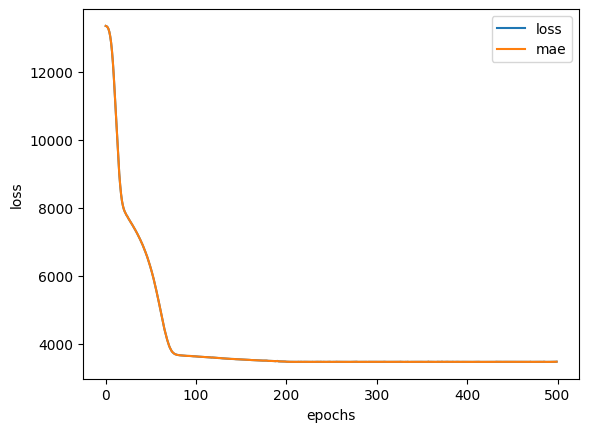

In [89]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [98]:
y_preds = modelo_insurance(x_teste_normal)
y_preds, y_teste

(<tf.Tensor: shape=(268, 1), dtype=float32, numpy=
 array([[ 9340.242  ],
        [ 6091.853  ],
        [44525.27   ],
        [ 9273.872  ],
        [32445.45   ],
        [ 5738.2593 ],
        [ 1253.4159 ],
        [13410.75   ],
        [ 3694.759  ],
        [10203.737  ],
        [35795.176  ],
        [ 7787.0195 ],
        [ 4343.7197 ],
        [40968.73   ],
        [43412.477  ],
        [40678.062  ],
        [10630.474  ],
        [40615.402  ],
        [ 8757.853  ],
        [38983.277  ],
        [ 4050.2656 ],
        [ 8024.833  ],
        [  798.703  ],
        [ 3167.5173 ],
        [10881.218  ],
        [11278.224  ],
        [12279.579  ],
        [ 4918.37   ],
        [ 9934.9    ],
        [  631.6453 ],
        [ 8307.853  ],
        [11718.52   ],
        [ 2085.5598 ],
        [ 5219.871  ],
        [ 3021.881  ],
        [ 8797.004  ],
        [ 1973.7965 ],
        [ 7943.8804 ],
        [41623.785  ],
        [37205.06   ],
        [ 3127.632  ],
      

In [90]:
modelo_insurance.save("Modelo_Previsao_Medicamentos.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
